In [2]:
import numpy as np
import sxs
import scipy
import gw_eccentricity
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, "./tools")
import loading
import decomposition
from importlib import reload
reload(loading)
reload(decomposition)

/u/pjn/conda-envs/ecc_measuring/lib/python3.9/site-packages/gw_eccentricity/load_data.py:6: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


<module 'decomposition' from '/urania/u/pjn/gitrepos/EccentricWaveformDecomposition/./tools/decomposition.py'>

In [3]:
IDs = [str(x).zfill(2) for x in range(1, 13)]
IDs.append("90")

# IDs = ["01", "06", ]

N_runs = np.size(IDs)
extrapolation_order = 2
project = "SurveyMeanAno_v2"
wfs, metadata, horizon = loading.LoadData(IDs, extrapolation_order, project)
h22 = loading.RestrictTo22and20Mode(wfs, IDs)
h22_total = loading.CutJunk(h22, IDs, junk_time=500)
h22 = loading.RestrictToFirstPeriastron(h22, IDs)
h22 = loading.RestrictToInspiral(h22, IDs)
h22 = loading.Align(h22, IDs)
h22 = loading.AddQCData(h22)
h22 = decomposition.AddMeanAnomalyDomain(h22, IDs, periastron_definition="QC")

In [4]:
h22 = loading.AddA22andPhi22(h22, IDs)

In [5]:
e, l = decomposition.MeasureReferenceEccandMeanAno(h22, IDs)

/u/pjn/conda-envs/ecc_measuring/lib/python3.9/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-226.1840353275893, -83.0840353270687]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/ecc_measuring/lib/python3.9/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-246.50618200413555, -98.20618200359604]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/ecc_measuring/lib/python3.9/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-270.5285018147879, -119.02850181423673]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/ecc_measuring/lib/python3.9/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-284.74739586332726

In [6]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=2*np.pi)
mappable = cm.ScalarMappable(norm=norm, cmap='twilight')

Text(0, 0.5, 'A22')

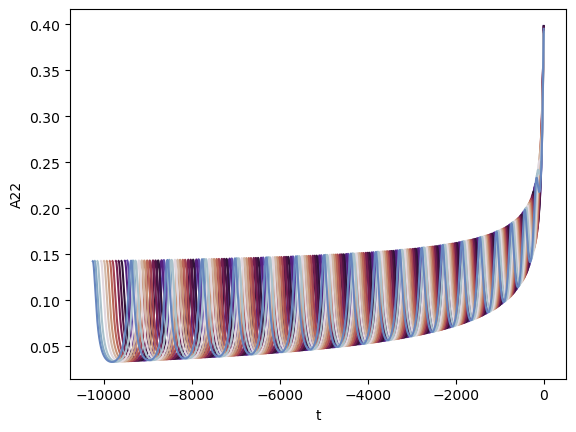

In [7]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
# plt.plot(h22["QC"]["t"], np.abs(h22["QC"]["h22"]))
plt.ylabel("A22")

In [8]:
A22_QC = np.abs(h22["QC"]["h22"])
t_QC = h22["QC"]["t"]
A22_QC_interp = scipy.interpolate.interp1d(t_QC, A22_QC)

(-100.0, 0.0)

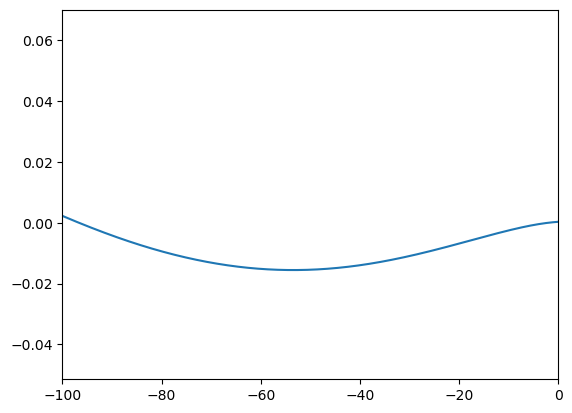

In [9]:
plt.plot(h22[IDs[0]]["t"], np.abs(h22[IDs[0]]["h22"])-A22_QC_interp(h22[IDs[0]]["t"]))
plt.xlim(-100, 0)

(-1000.0, 0.0)

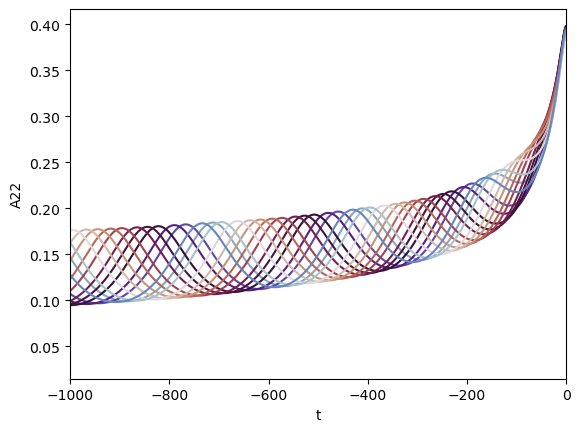

In [10]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
plt.ylabel("A22")
plt.xlim(-1000, 0)

Text(0, 0.5, '$\\ell$')

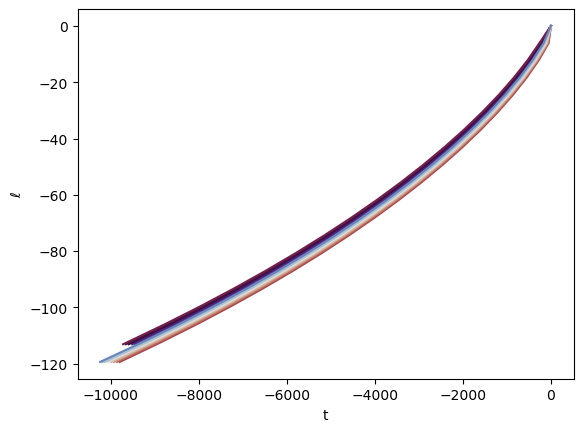

In [11]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], h22[IDs[k]]["MeanAno"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
plt.ylabel("$\ell$")

Text(0, 0.5, 'A22')

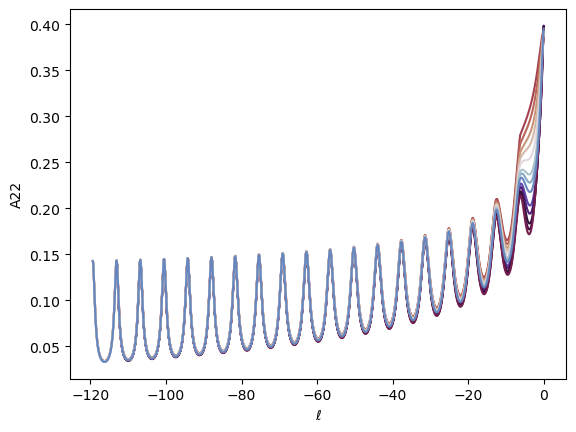

In [12]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")

(-6.283185307179586, 0.0)

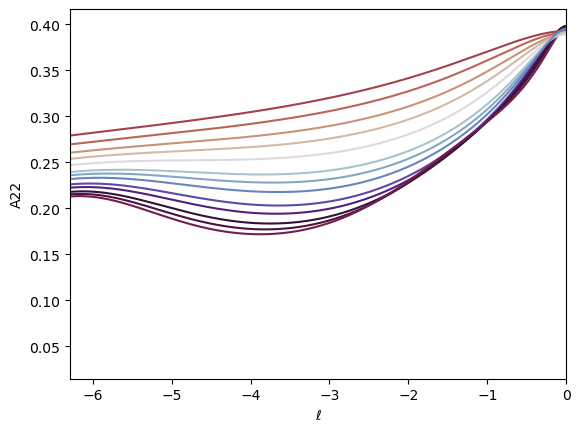

In [13]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-2*np.pi, 0)

(0.04, 0.16)

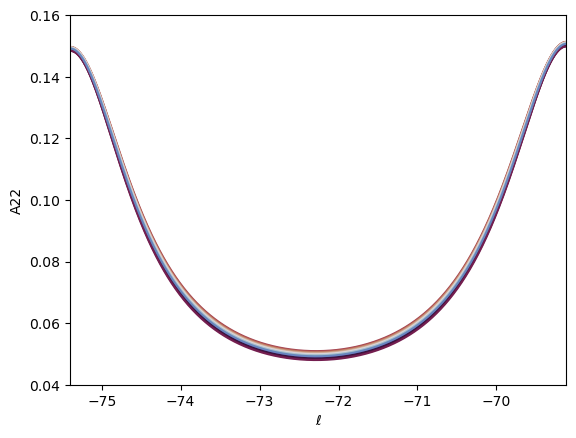

In [14]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-24*np.pi, -22*np.pi)
plt.ylim(0.04, 0.16)

(0.04, 0.06)

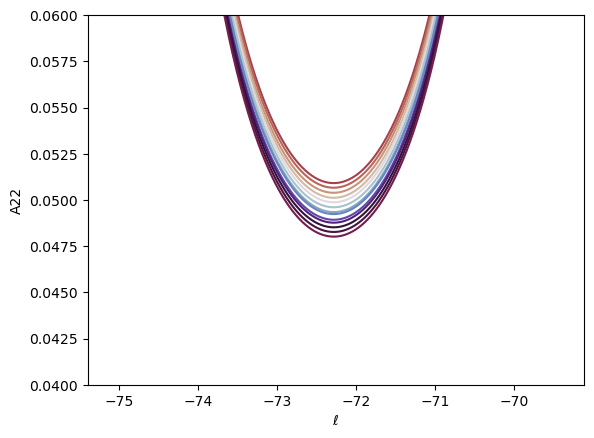

In [15]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-24*np.pi, -22*np.pi)
plt.ylim(0.04, 0.16)
plt.ylim(0.04, 0.06)

Text(0, 0.5, 'phi22')

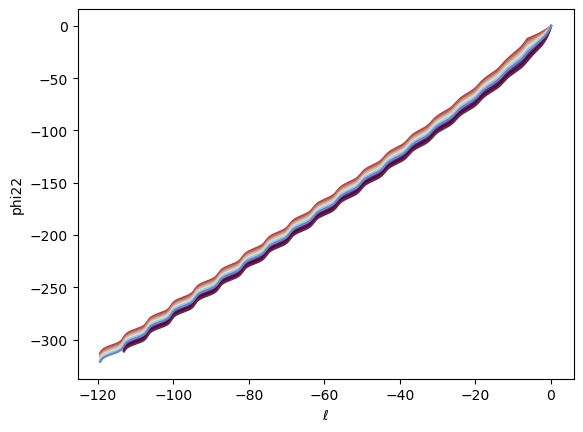

In [18]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")

(-40.0, 0.0)

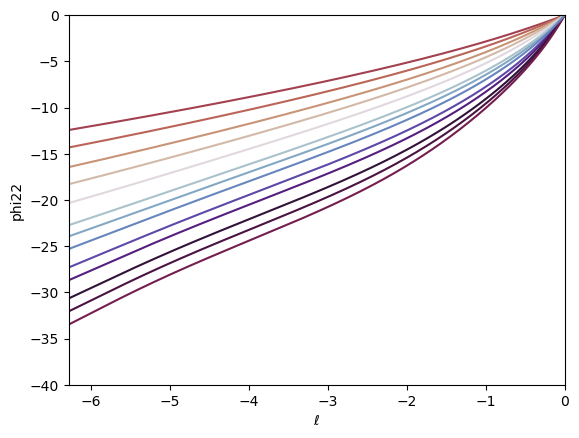

In [21]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")
plt.xlim(-2*np.pi, 0)
plt.ylim(-40, 0)

(-110.0, -70.0)

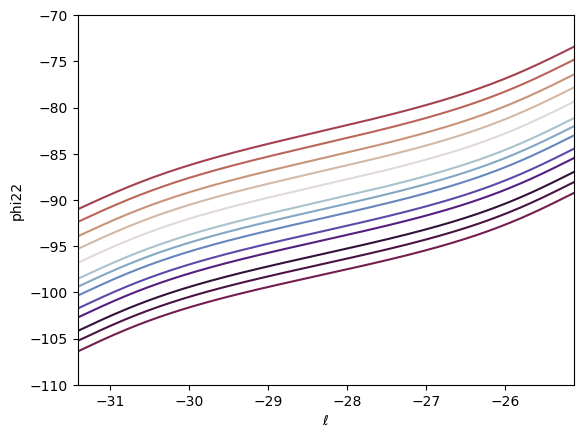

In [26]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")
plt.xlim(-10*np.pi, -8*np.pi)
plt.ylim(-110, -70)